<a href="https://colab.research.google.com/github/EdwardTong899/ML-base-Malware-Detection/blob/main/ML_base_Malware_Detection_ipynb%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import data

Feature label ={cpu-cycles , dTLB-loads , instructions , ref-cycles}

class = {0'1} #1=benign 0=malware

In [3]:
## import packages and load data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

df = pd.read_excel("trofold.xlsx")
df['class'] = df['class'].apply(lambda x:1 if(x=="yes") else 0).astype(int)
df

,L1-dcache-loads,L1-dcache-stores,branch-instructions,cpu-cycles,dTLB-loads,instructions,ref-cycles,stalled-cycles-frontend,class
0,87926484,25751352,49789017,337627840,91260226,196881154,300352090,76432996,1
1,96163086,25738341,51464455,354627943,96397954,200282092,306308034,76319524,1
2,96069790,26451199,51553178,353160407,96098384,200790789,305352605,74351280,1
3,95507856,27192605,51693771,352139361,94128726,202828734,306172910,75247434,1
4,96942359,26919249,52222798,351282309,95625085,201688992,306104705,75755796,1
...,...,...,...,...,...,...,...,...,...
5686,1428016,855636,1473493,11327469,1428016,7135492,8773952,7582095,0
5687,1453710,843508,305287,2690930,1453710,1512724,8292768,2035721,0
5688,2509027,1526222,276002,3205824,2509027,1408428,11823424,2494655,0
5689,1375263,795298,314271,3002840,1375263,1621705,7744096,2221633,0


In [4]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(df, random_state=777, train_size=0.7)
print('訓練資料有%s筆' %len(train_data))
print('驗證資料有%s筆' %len(val_data))

X_train_df = train_data.drop(["class","L1-dcache-loads","L1-dcache-stores","branch-instructions","stalled-cycles-frontend"], axis=1) #,"L1-dcache-stores","dTLB-loads","L1-dcache-loads","branch-instructions"
X_train = np.array(X_train_df).astype(float)
Y_train_df = train_data['class']
Y_train = np.array(Y_train_df).astype(int)

X_valid_df = val_data.drop(["class","L1-dcache-loads","L1-dcache-stores","branch-instructions","stalled-cycles-frontend"], axis=1) #,"L1-dcache-stores","dTLB-loads"
X_valid = np.array(X_valid_df).astype(float)
Y_valid_df = val_data['class']
Y_valid = np.array(Y_valid_df).astype(int)

print(X_valid_df)

訓練資料有3983筆
驗證資料有1708筆
      cpu-cycles  dTLB-loads  instructions  ref-cycles
2295    20915611     2048081       3854066    14186272
5169      893687       49339        163807      785408
542      7489093      289694       1285333     8407104
4514     8150207     1141568       5274279    19569888
4786     4040778      437825        763998     2114592
...          ...         ...           ...         ...
82     174575196   126251225     274039700   157703383
560      6379820      335012        930879     7269984
4393    25507149     8542106      41583391    30831072
2090     7434006      293820        740168    21180544
3619   217050576    26680442     172330072   215604576

[1708 rows x 4 columns]


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def score(m, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred=m.predict(x_train)
        print('Train Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_train, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_train, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_train, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_train, pred)}")
    elif train == False:
        pred=m.predict(x_test)
        print('Test Result:\n')
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        print(f"Precision Score: {precision_score(y_test, pred)*100:.2f}%")
        print(f"Recall Score: {recall_score(y_test, pred)*100:.2f}%")
        print(f"F1 score: {f1_score(y_test, pred)*100:.2f}%")
        print(f"Confusion Matrix:\n {confusion_matrix(y_test, pred)}")

# XGBoost model

In [6]:
from xgboost import XGBClassifier
xg1 = XGBClassifier()
xg1=xg1.fit(X_train, Y_train)
xg1_val=xg1.predict(X_valid)


accuracy_score(Y_valid,xg1_val)

0.9238875878220141

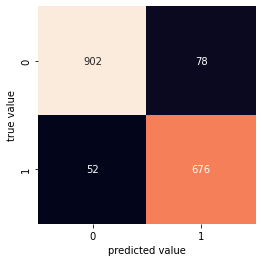

Valdation accuracy: 0.9238875878220141
report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       980
           1       0.90      0.93      0.91       728

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708

Total time took: 0.17375612258911133s


0.9238875878220141

In [7]:
# xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
import time
ts = time.time()




# Confusion Matrix
mat = confusion_matrix(Y_valid, xg1_val)
sns.heatmap(mat,square= True, annot=True, cbar= False, fmt='d')
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# Accuracy
accuracy = metrics.accuracy_score(Y_valid, xg1_val)
print('Valdation accuracy:', accuracy)

# precision, recall, f1-score
#target_names = ['0','1','2','3']
target_names = ['0','1']

print("report:\n",classification_report(Y_valid, xg1_val, target_names=target_names))

print('Total time took: {0}s'.format(time.time()-ts))

accuracy_score(Y_valid,xg1_val)
## Valdation accuracy: 0.8923076923076924
## Test accuracy: 0.41203281677301734

# AdaBoost model

In [8]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators = 100)
boost_fit = boost.fit(X_train, Y_train)
boost_val=boost.predict(X_valid)

accuracy_score(Y_valid,boost_val)


0.9086651053864169

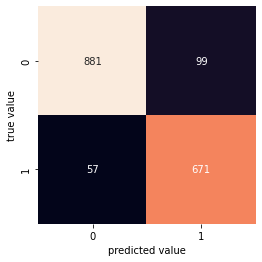

Valdation accuracy: 0.9086651053864169
report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       980
           1       0.87      0.92      0.90       728

    accuracy                           0.91      1708
   macro avg       0.91      0.91      0.91      1708
weighted avg       0.91      0.91      0.91      1708

Total time took: 0.1292409896850586s


0.9086651053864169

In [9]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
import time
ts = time.time()




# Confusion Matrix
mat = confusion_matrix(Y_valid, boost_val)
sns.heatmap(mat,square= True, annot=True, cbar= False, fmt='d')
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# Accuracy
accuracy = metrics.accuracy_score(Y_valid, boost_val)
print('Valdation accuracy:', accuracy)

# precision, recall, f1-score
#target_names = ['0','1','2','3']
target_names = ['0','1']

print("report:\n",classification_report(Y_valid, boost_val, target_names=target_names))

print('Total time took: {0}s'.format(time.time()-ts))

accuracy_score(Y_valid,boost_val)
## Valdation accuracy: 0.8923076923076924
## Test accuracy: 0.41203281677301734

# Decision Tree model

Training took: 0.029178857803344727s


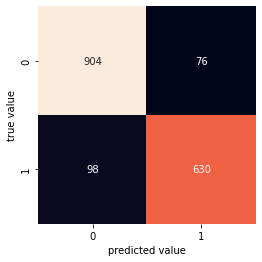

Valdation accuracy: 0.8981264637002342
report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       980
           1       0.89      0.87      0.88       728

    accuracy                           0.90      1708
   macro avg       0.90      0.89      0.90      1708
weighted avg       0.90      0.90      0.90      1708

Total time took: 0.17353463172912598s


0.8981264637002342

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
import numpy as np
import time
ts = time.time()

# 建立決策樹模型
## criterion使用entropy來計算訊息增益 
## max_depth是指樹狀圖的最大深度
dt = DecisionTreeClassifier(max_depth=10,criterion='entropy')
dt.fit(X_train,Y_train)

print('Training took: {0}s'.format(time.time()-ts))

# 驗證績效
yhat_val_dt = dt.predict(X_valid)

# Confusion Matrix
mat = confusion_matrix(Y_valid, yhat_val_dt)
sns.heatmap(mat,square= True, annot=True, cbar= False, fmt='d')
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()

# Accuracy
accuracy = metrics.accuracy_score(Y_valid, yhat_val_dt)
print('Valdation accuracy:', accuracy)

# precision, recall, f1-score
#target_names = ['0','1','2','3']
target_names = ['0','1']

print("report:\n",classification_report(Y_valid, yhat_val_dt, target_names=target_names))

print('Total time took: {0}s'.format(time.time()-ts))

accuracy_score(Y_valid,yhat_val_dt)
## Valdation accuracy: 0.8923076923076924
## Test accuracy: 0.41203281677301734